In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import pywt
import matplotlib.pyplot as plt

These are all the available discrete wavelets

In [ ]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

These are all the available continuous wavelets

In [ ]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

1. Reference to the below paper, best wavelet they've found is gaus1, so we'll first perfom CWT using gaus1, gaus 2 and gaus3 wavelets

  2013_Eswara Rao_Effective Delineation of Formation Tops Using Wavelet Transform on Well log Data of Kutch Offshore Basin, India

2. Then for the Holder exponent with reference to the below paper we'll use morlet wavelet

  2002_LeilaAliouane_WellLogsData ProcessingUsingtheFractalAnalysisandNeural Network



In [ ]:
filename = 'facies_PE_ET.csv'
training_data = pd.read_csv(filename)

In [ ]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']     
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
scales=1

CWT with gaus1 wavelet

In [ ]:
GRcoef_gaus1, GRfreqs_gaus1 = pywt.cwt(training_data['GR'],scales,'gaus1')
ILD_log10coef_gaus1, ILD_log10freqs_gaus1 = pywt.cwt(training_data['ILD_log10'],scales,'gaus1')
DeltaPHIcoef_gaus1,DeltaPHIfreqs_gaus1=pywt.cwt(training_data['DeltaPHI'],scales,'gaus1')
PHINDcoef_gaus1,PHINDfreqs_gaus1=pywt.cwt(training_data['PHIND'],scales,'gaus1')
PEcoef_gaus1,PEfreqs_gaus1=pywt.cwt(training_data['PE'],scales,'gaus1')
#Fcoef_gaus1,Ffreqs_gaus1=pywt.cwt(training_data['F'],scales,'gaus1')

In [ ]:
training_data["GRcoef_gaus1"]=GRcoef_gaus1.transpose()
training_data["ILD_log10coef_gaus1"]=ILD_log10coef_gaus1.transpose()
training_data["DeltaPHIcoef_gaus1"]=DeltaPHIcoef_gaus1.transpose()
training_data["PHINDcoef_gaus1"]=DeltaPHIcoef_gaus1.transpose()
training_data["PEcoef_gaus1"]=PEcoef_gaus1.transpose()
#training_data["F_gaus1"]=Fcoef_gaus1.transpose()

In [ ]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GRcoef_gaus1,ILD_log10coef_gaus1,DeltaPHIcoef_gaus1,PHINDcoef_gaus1,PEcoef_gaus1
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.761512,1.518438,0.521852,-0.008590,-0.000234,0.000025,0.000025,-0.000590
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.839810,0.499720,0.286644,14.492472,0.072188,2.857822,2.857822,0.363086
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000,-177.381305,-0.892911,-18.090076,-18.090076,-3.935624
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.200000,1.000000,0.277000,-4.900384,-0.031860,-1.209854,-1.209854,-0.135940
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.600000,2.000000,0.528000,-0.475643,0.001511,-0.004720,-0.004720,0.003221
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000,4.402320,0.031094,1.117870,1.117870,0.147185
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,156.327943,0.503975,22.168388,22.168388,2.087333


CWT with gaus2 wavelet

In [ ]:
GRcoef_gaus2, GRfreqs_gaus2 = pywt.cwt(training_data['GR'],scales,'gaus2')
ILD_log10coef_gaus2, ILD_log10freqs_gaus2 = pywt.cwt(training_data['ILD_log10'],scales,'gaus2')
DeltaPHIcoef_gaus2,DeltaPHIfreqs_gaus2=pywt.cwt(training_data['DeltaPHI'],scales,'gaus2')
PHINDcoef_gaus2,PHINDfreqs_gaus2=pywt.cwt(training_data['PHIND'],scales,'gaus2')
PEcoef_gaus2,PEfreqs_gaus2=pywt.cwt(training_data['PE'],scales,'gaus2')
#Fcoef_gaus2,Ffreqs_gaus2=pywt.cwt(training_data['F'],scales,'gaus2')

In [ ]:
training_data["GRcoef_gaus2"]=GRcoef_gaus2.transpose()
training_data["ILD_log10coef_gaus2"]=ILD_log10coef_gaus2.transpose()
training_data["DeltaPHIcoef_gaus2"]=DeltaPHIcoef_gaus2.transpose()
training_data["PHINDcoef_gaus2"]=DeltaPHIcoef_gaus2.transpose()
training_data["PEcoef_gaus2"]=PEcoef_gaus2.transpose()
#training_data["F_gaus2"]=Fcoef_gaus2.transpose()

In [ ]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GRcoef_gaus1,ILD_log10coef_gaus1,DeltaPHIcoef_gaus1,PHINDcoef_gaus1,PEcoef_gaus1,GRcoef_gaus2,ILD_log10coef_gaus2,DeltaPHIcoef_gaus2,PHINDcoef_gaus2,PEcoef_gaus2
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.761512,1.518438,0.521852,-0.008590,-0.000234,0.000025,0.000025,-0.000590,0.012986,0.000164,0.001346,0.001346,0.000777
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.839810,0.499720,0.286644,14.492472,0.072188,2.857822,2.857822,0.363086,6.265971,0.028111,1.537473,1.537473,0.177989
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000,-177.381305,-0.892911,-18.090076,-18.090076,-3.935624,-78.459770,-0.419898,-12.422916,-12.422916,-1.600629
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.200000,1.000000,0.277000,-4.900384,-0.031860,-1.209854,-1.209854,-0.135940,-1.909254,-0.007300,-0.516023,-0.516023,-0.068847
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.600000,2.000000,0.528000,-0.475643,0.001511,-0.004720,-0.004720,0.003221,-0.188317,-0.000679,-0.034557,-0.034557,-0.001249
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000,4.402320,0.031094,1.117870,1.117870,0.147185,1.580613,0.006118,0.527861,0.527861,0.061628
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,156.327943,0.503975,22.168388,22.168388,2.087333,92.654060,0.513474,12.217609,12.217609,1.944590


CWT with gaus3 wavelet

In [ ]:
GRcoef_gaus3, GRfreqs_gaus3 = pywt.cwt(training_data['GR'],scales,'gaus3')
ILD_log10coef_gaus3, ILD_log10freqs_gaus3 = pywt.cwt(training_data['ILD_log10'],scales,'gaus3')
DeltaPHIcoef_gaus3,DeltaPHIfreqs_gaus3=pywt.cwt(training_data['DeltaPHI'],scales,'gaus3')
PHINDcoef_gaus3,PHINDfreqs_gaus3=pywt.cwt(training_data['PHIND'],scales,'gaus3')
PEcoef_gaus3,PEfreqs_gaus3=pywt.cwt(training_data['PE'],scales,'gaus3')
#Fcoef_gaus3,Ffreqs_gaus3=pywt.cwt(training_data['F'],scales,'gaus3')

In [ ]:
training_data["GRcoef_gaus3"]=GRcoef_gaus3.transpose()
training_data["ILD_log10coef_gaus3"]=ILD_log10coef_gaus3.transpose()
training_data["DeltaPHIcoef_gaus3"]=DeltaPHIcoef_gaus3.transpose()
training_data["PHINDcoef_gaus3"]=PHINDcoef_gaus3.transpose()
training_data["PEcoef_gaus3"]=PEcoef_gaus3.transpose()
#training_data["F_gaus3"]=Fcoef_gaus3.transpose()

CWT with morlet wavelet

In [ ]:
GRcoef_morl, GRfreqs_morl = pywt.cwt(training_data['GR'],scales,'morl')
ILD_log10coef_morl, ILD_log10freqs_morl = pywt.cwt(training_data['ILD_log10'],scales,'morl')
DeltaPHIcoef_morl,DeltaPHIfreqs_morl=pywt.cwt(training_data['DeltaPHI'],scales,'morl')
PHINDcoef_morl,PHINDfreqs_morl=pywt.cwt(training_data['PHIND'],scales,'morl')
PEcoef_morl,PEfreqs_morl=pywt.cwt(training_data['PE'],scales,'morl')
#Fcoef_morl,Ffreqs_morl=pywt.cwt(training_data['F'],scales,'morl')

In [ ]:
training_data["GRcoef_morl"]=GRcoef_morl.transpose()
training_data["ILD_log10coef_morl"]=ILD_log10coef_morl.transpose()
training_data["DeltaPHIcoef_morl"]=DeltaPHIcoef_morl.transpose()
training_data["PHINDcoef_morl"]=PHINDcoef_morl.transpose()
training_data["PEcoef_morl"]=PEcoef_morl.transpose()
#training_data["F_morl"]=Fcoef_morl.transpose()

In [ ]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GRcoef_gaus1,ILD_log10coef_gaus1,DeltaPHIcoef_gaus1,PHINDcoef_gaus1,PEcoef_gaus1,GRcoef_gaus2,ILD_log10coef_gaus2,DeltaPHIcoef_gaus2,PHINDcoef_gaus2,PEcoef_gaus2,GRcoef_gaus3,ILD_log10coef_gaus3,DeltaPHIcoef_gaus3,PHINDcoef_gaus3,PEcoef_gaus3,GRcoef_morl,ILD_log10coef_morl,DeltaPHIcoef_morl,PHINDcoef_morl,PEcoef_morl
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.761512,1.518438,0.521852,-0.008590,-0.000234,0.000025,0.000025,-0.000590,0.012986,0.000164,0.001346,0.001346,0.000777,-0.007029,-0.000091,-0.000729,-0.000978,-0.000438,-0.003909,-0.000049,-0.000396,-0.000595,-0.000235
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.839810,0.499720,0.286644,14.492472,0.072188,2.857822,2.857822,0.363086,6.265971,0.028111,1.537473,1.537473,0.177989,4.425136,0.020428,1.205678,1.303231,0.145841,1.932236,0.008752,0.486028,0.557184,0.055952
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000,-177.381305,-0.892911,-18.090076,-18.090076,-3.935624,-78.459770,-0.419898,-12.422916,-12.422916,-1.600629,-68.103653,-0.529172,-13.468554,-23.427946,-2.235573,-27.846355,-0.165378,-3.992175,-7.742404,-0.628246
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.200000,1.000000,0.277000,-4.900384,-0.031860,-1.209854,-1.209854,-0.135940,-1.909254,-0.007300,-0.516023,-0.516023,-0.068847,-1.039658,-0.002505,-0.342851,-0.233247,-0.045724,-0.466617,-0.001727,-0.163384,-0.121246,-0.018813
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.600000,2.000000,0.528000,-0.475643,0.001511,-0.004720,-0.004720,0.003221,-0.188317,-0.000679,-0.034557,-0.034557,-0.001249,-0.015268,0.000049,0.001290,0.005375,0.000470,0.053806,0.000152,0.011512,0.012781,0.000269
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000,4.402320,0.031094,1.117870,1.117870,0.147185,1.580613,0.006118,0.527861,0.527861,0.061628,1.008128,0.002464,0.317863,0.231612,0.046628,0.569506,0.002098,0.159937,0.148016,0.022598
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,156.327943,0.503975,22.168388,22.168388,2.087333,92.654060,0.513474,12.217609,12.217609,1.944590,90.650972,0.276038,12.056356,24.332105,1.022408,25.538677,0.136122,4.043373,6.886974,0.501265


In [ ]:
training_data.to_csv('facies_PE_ET_Wavelets.csv')

In [ ]:
filename = 'facies_PE_ET_Wavelets.csv'
training_data = pd.read_csv(filename)

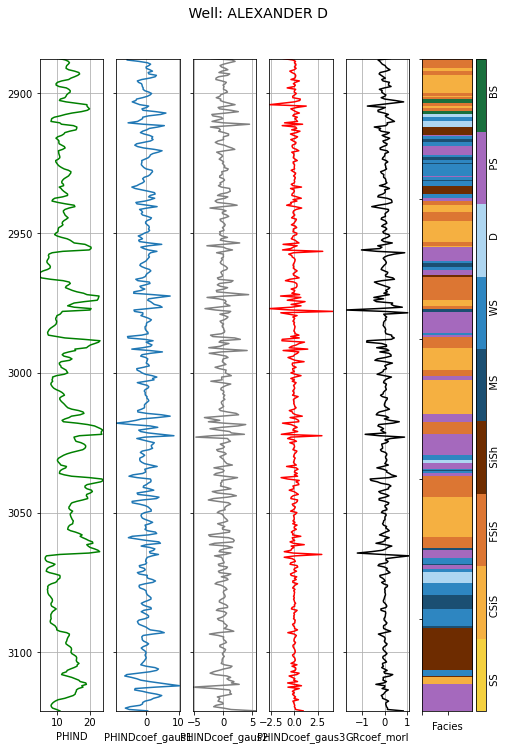

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.PHIND, logs.Depth, '-g')
    ax[1].plot(logs.PHINDcoef_gaus1, logs.Depth, '-')
    ax[2].plot(logs.PHINDcoef_gaus2, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHINDcoef_gaus3, logs.Depth, '-', color='r')
    ax[4].plot(logs.PHINDcoef_morl, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("PHIND")
    ax[0].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[1].set_xlabel("PHINDcoef_gaus1")
    ax[1].set_xlim(logs.PHINDcoef_gaus1.min(),logs.PHINDcoef_gaus1.max())
    ax[2].set_xlabel("PHINDcoef_gaus2")
    ax[2].set_xlim(logs.PHINDcoef_gaus2.min(),logs.PHINDcoef_gaus2.max())
    ax[3].set_xlabel("PHINDcoef_gaus3")
    ax[3].set_xlim(logs.PHINDcoef_gaus3.min(),logs.PHINDcoef_gaus3.max())
    ax[4].set_xlabel("GRcoef_morl")
    ax[4].set_xlim(logs.PHINDcoef_morl.min(),logs.PHINDcoef_morl.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle(' Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    
make_facies_log_plot(
training_data[training_data['Well Name'] == 'ALEXANDER D'],facies_colors)

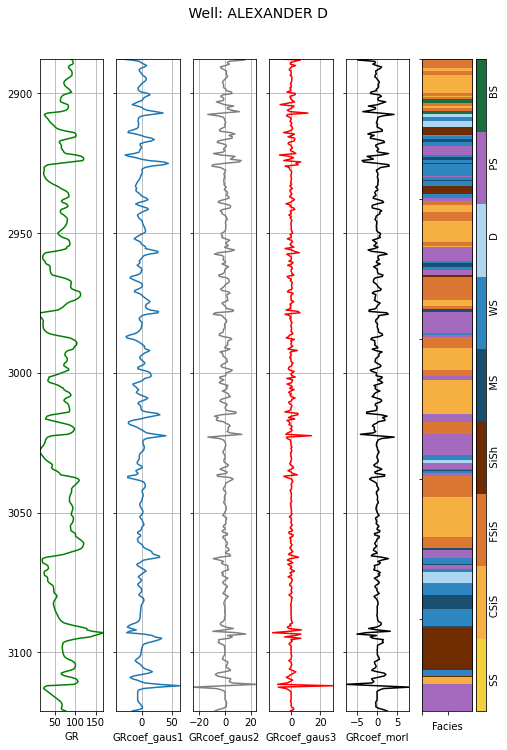

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'ALEXANDER D'],facies_colors)

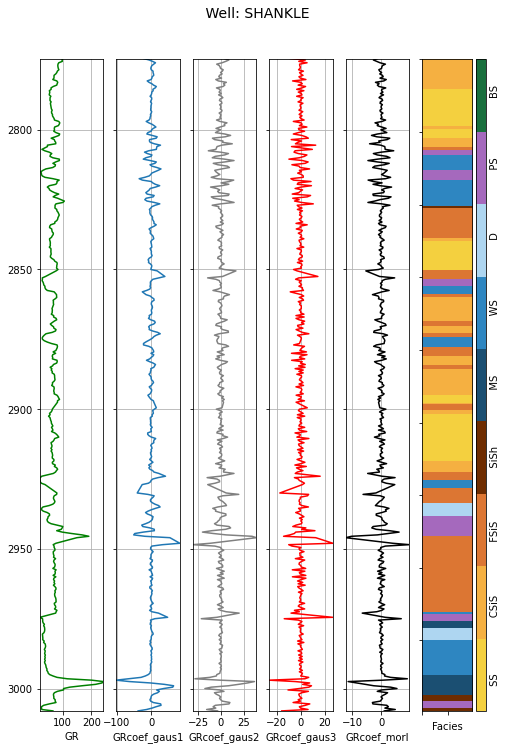

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'SHANKLE'],facies_colors)

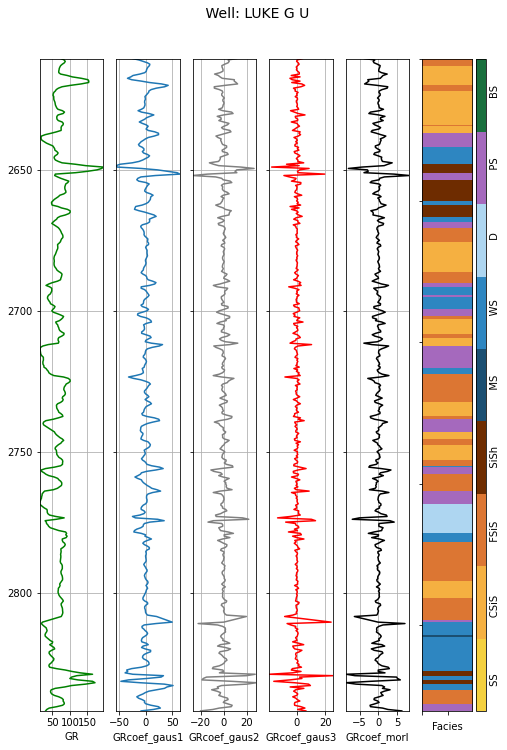

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'LUKE G U'],facies_colors)

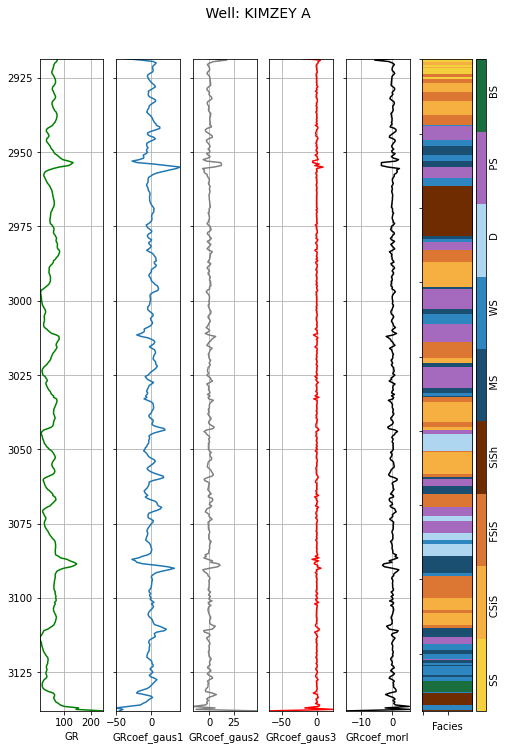

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'KIMZEY A'],facies_colors)

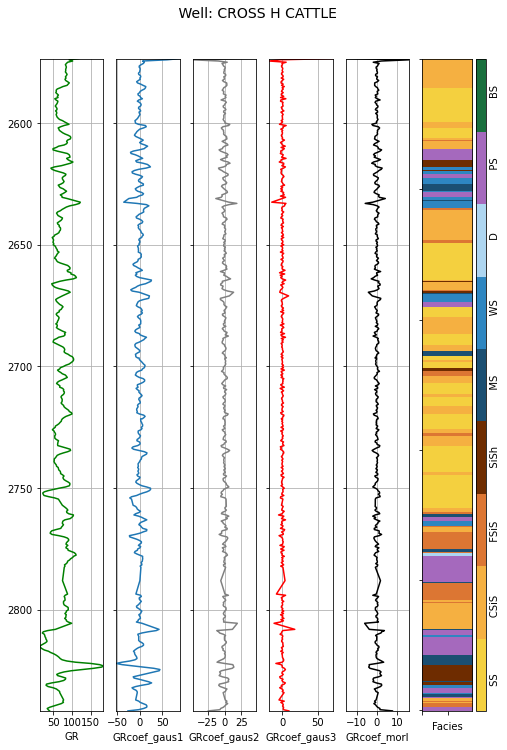

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'CROSS H CATTLE'],facies_colors)

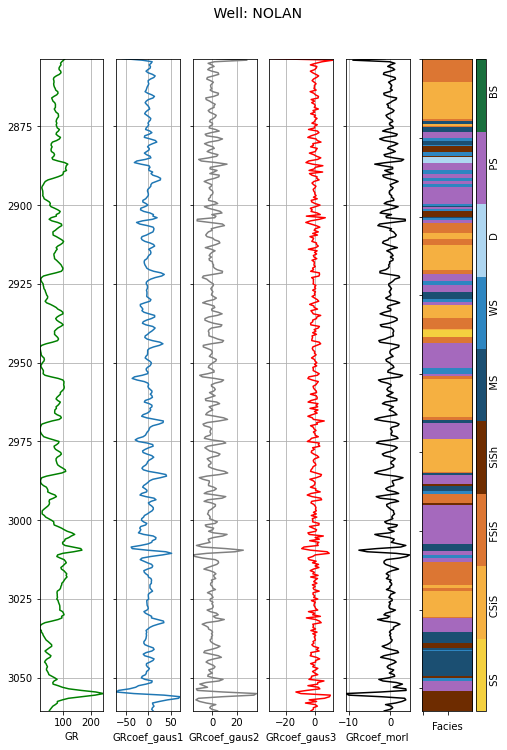

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'NOLAN'],facies_colors)

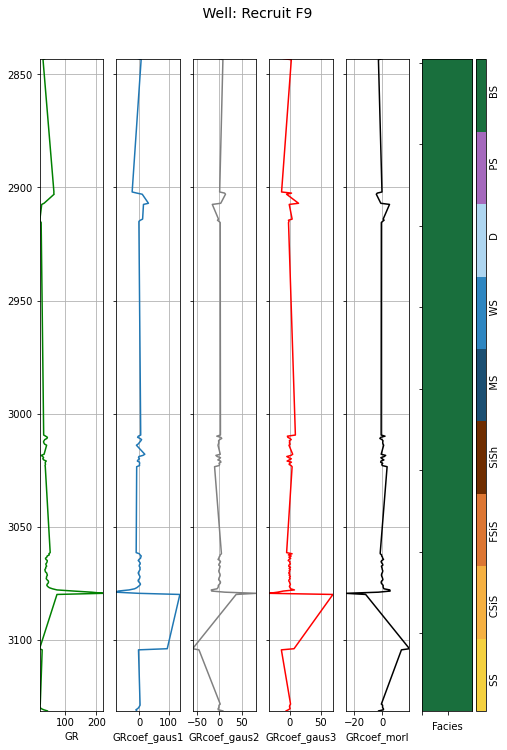

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'Recruit F9'],facies_colors)

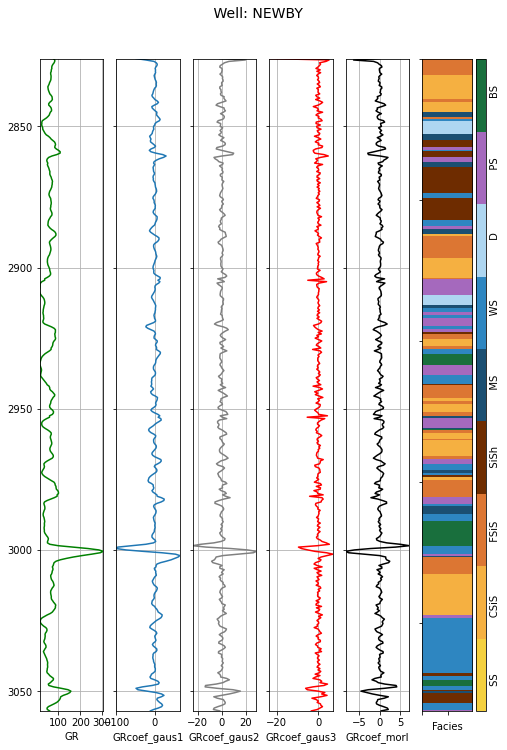

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'NEWBY'],facies_colors)

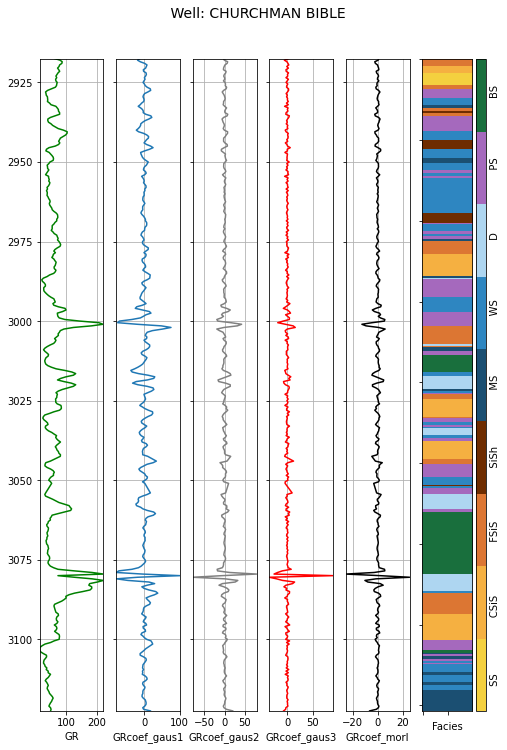

In [ ]:
make_facies_log_plot(
training_data[training_data['Well Name'] == 'CHURCHMAN BIBLE'],facies_colors)